# 36120 AT1 Kaggle NBA prediction

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
# Load datasets
train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')
test_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\test.csv')

# Quick overview of the dataset
print(train_data.head())
print(train_data.info())


            team conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0  South Alabama   SB  26     29.5   97.3  16.6  42.5   44.43      1.6   
1       Utah St.  WAC  34     60.9  108.3  14.9  52.4   54.48      3.8   
2  South Florida   BE  27     72.0   96.2  21.8  45.7   47.98      2.1   
3     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   53.69      4.1   
4        Pacific   BW  33     56.2   96.5  22.0  52.8   54.31      8.3   

   DRB_per  ...     dgbpm    oreb    dreb    treb     ast     stl     blk  \
0      4.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462  0.0385   
1      6.3  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118  0.2353   
2      8.0  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815  0.0000   
3      9.4  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667  0.1333   
4     18.6  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545  0.3333   

       pts                             player_id  drafted  
0   3.8846  b2716b2d-3422-4959-9

C:\Users\13803\AppData\Local\Temp\ipykernel_11908\195921245.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')


In [16]:
# Check for missing values
print(train_data.isnull().sum())

train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

team         0
conf         0
GP           0
Min_per      0
Ortg         0
            ..
stl          0
blk          0
pts          0
player_id    0
drafted      0
Length: 64, dtype: int64


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\678615306.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(), inplace=True)
C:\Users\13803\AppData\Local\Temp\ipykernel_11908\678615306.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.fillna(test_data.mean(), inplace=True)


In [17]:
# Selected numerical variables based on the heatmap
selected_features = ['Ortg', 'eFG', 'FTM', 'FT_per', 'TP_per', 'stl_per', 'pfr', 
                     'Rec_Rank', 'dunksmade', 'bpm']

# Add the target variable (assuming it's labeled 'drafted')
X = train_data[selected_features]
y = train_data['drafted']

# For the test set, we'll also select the same features
X_test = test_data[selected_features]


In [18]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = rf_model.predict(X_val)

In [21]:
# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9906692406692407
Precision: 0.7027027027027027
Recall: 0.2549019607843137
F1 Score: 0.3741007194244604


In [139]:
y_test_prob = rf_model.predict_proba(X_test_scaled)[:, 1] 

y_test_prob_rounded = np.round(y_test_prob, 1)

submission = pd.DataFrame({'player_id': test_data['player_id'], 'draft_probability': y_test_prob_rounded})
submission.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\sample_submission.csv', index=False)

C:\Users\13803\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 ### 1st public submissiong score: 0.83492

In [65]:
train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')

numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

if 'drafted' in numerical_features:
    numerical_features.remove('drafted')

print("Numerical features included:", numerical_features)


Numerical features included: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\3883131733.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')


In [66]:
train_data.fillna(train_data.mean(), inplace=True)

X = train_data[numerical_features]
y = train_data['drafted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\117839134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(), inplace=True)


In [68]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [69]:
y_val_pred = rf_model.predict(X_val)

y_val_proba = rf_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: {:.5f}".format(accuracy))
print("Validation Precision: {:.5f}".format(precision))
print("Validation Recall: {:.5f}".format(recall))
print("Validation F1 Score: {:.5f}".format(f1))
print("Validation AUC Score: {:.5f}".format(auc_score))


Validation Accuracy: 0.99206
Validation Precision: 0.80435
Validation Recall: 0.36275
Validation F1 Score: 0.50000
Validation AUC Score: 0.99611


In [70]:
print(test_data.columns)

submission = pd.DataFrame({
    'player_id': test_data['player_id'],
    'draft_probability': y_test_prob_rounded
})

submission.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\submission2.csv', index=False)


Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id'],
      dtype='object')


### 2nd submission is 0.90593

In [71]:
train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')

numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

if 'drafted' in numerical_features:
    numerical_features.remove('drafted')

print("Numerical features included:", numerical_features)

Numerical features included: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\667913263.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')


In [72]:
train_data.fillna(train_data.mean(), inplace=True)

X = train_data[numerical_features]
y = train_data['drafted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\117839134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(), inplace=True)


In [73]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10]  
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_scaled, y)  

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  14.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  13.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  27.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  28.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  27.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  42.8s
[CV] END max_depth=10, min_samples_split=2, n_e

In [74]:

best_rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=42)
best_rf_model.fit(X_scaled, y) 

RandomForestClassifier(max_depth=10, random_state=42)

In [77]:
y_val_pred = best_rf_model.predict(X_val)

y_val_proba = best_rf_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: {:.5f}".format(accuracy))
print("Validation Precision: {:.5f}".format(precision))
print("Validation Recall: {:.5f}".format(recall))
print("Validation F1 Score: {:.5f}".format(f1))
print("Validation AUC Score: {:.5f}".format(auc_score))

Validation Accuracy: 0.99893
Validation Precision: 1.00000
Validation Recall: 0.90196
Validation F1 Score: 0.94845
Validation AUC Score: 1.00000


In [75]:
y_test_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_prob_rounded = np.round(y_test_prob, 1) 

submission = pd.DataFrame({
    'player_id': test_data['player_id'],
    'draft_probability': y_test_prob_rounded
})
submission.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\submission3.csv', index=False)


### 3rd submission is 0.76734

In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores: ", cv_scores)
print("Mean AUC Score: ", cv_scores.mean())


Cross-Validation AUC Scores:  [0.99409671 0.99526107 0.99643515 0.99607595 0.99443921]
Mean AUC Score:  0.995261618647554


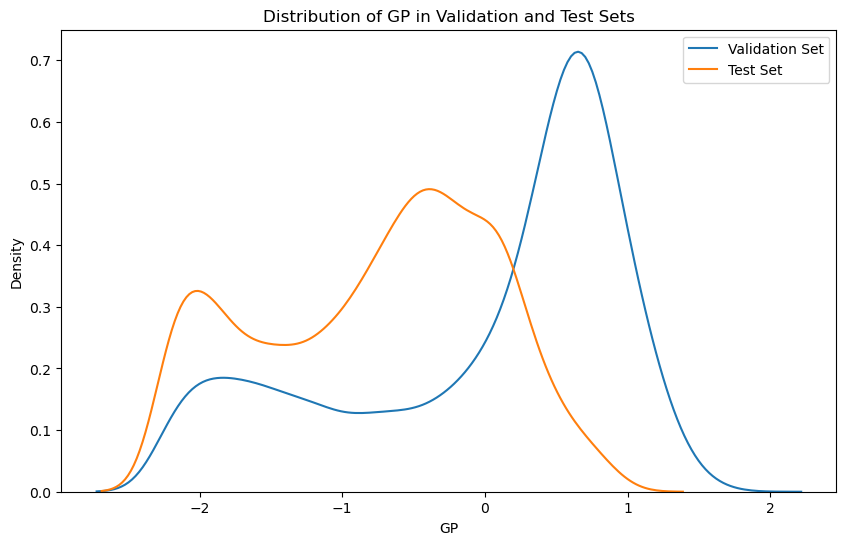

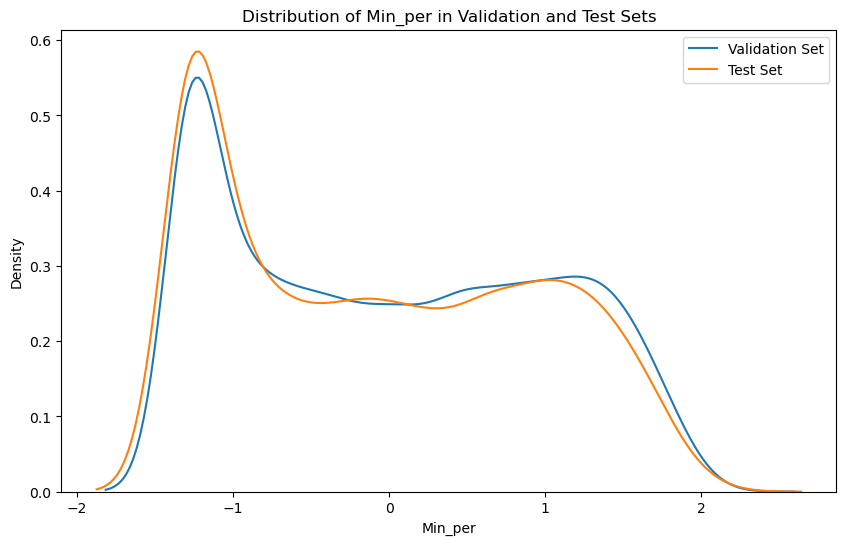

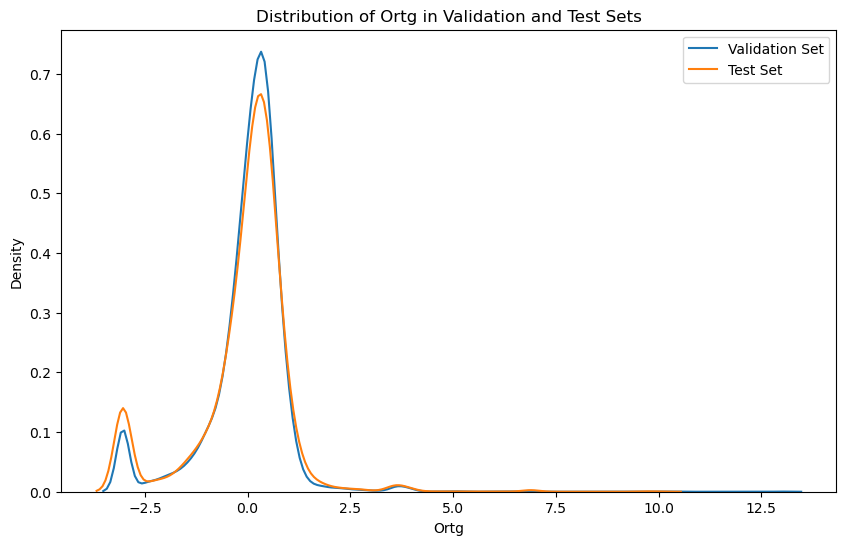

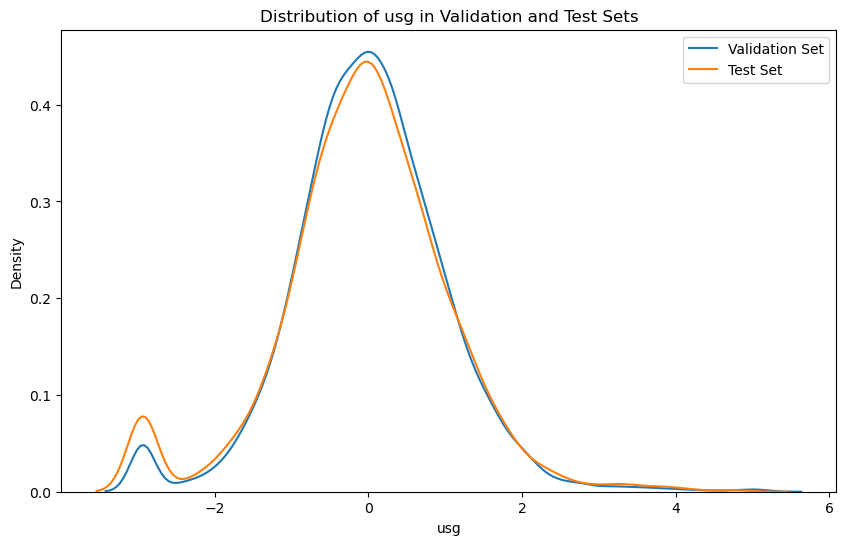

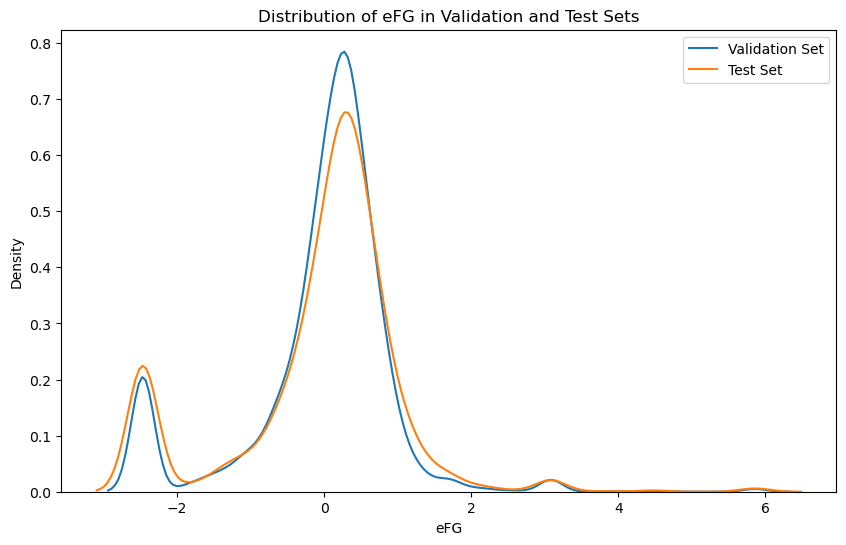

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

X_val_df = pd.DataFrame(X_val, columns=numerical_features)  
X_test_df = pd.DataFrame(X_test_scaled, columns=numerical_features)  

for feature in ['GP', 'Min_per', 'Ortg', 'usg', 'eFG']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(X_val_df[feature], label='Validation Set')
    sns.kdeplot(X_test_df[feature], label='Test Set')
    plt.title(f'Distribution of {feature} in Validation and Test Sets')
    plt.legend()
    plt.show()


In [86]:
train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')

numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

if 'drafted' in numerical_features:
    numerical_features.remove('drafted')

print("Numerical features included:", numerical_features)

Numerical features included: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


C:\Users\13803\AppData\Local\Temp\ipykernel_11908\667913263.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')


In [91]:


from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=6,  
    n_estimators=100,  
    learning_rate=0.05,  
    subsample=0.8,  
    colsample_bytree=0.8, 
    min_child_weight=5,  
    scale_pos_weight=1  
)
xgb_model.fit(X_scaled, y)


submission_xgb = pd.DataFrame({
    'player_id': test_data['player_id'],
    'draft_probability': y_test_prob_rounded_xgb
})
submission_xgb.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\submission_xgb.csv', index=False)


In [92]:
y_val_pred = xgb_model.predict(X_val)

y_val_proba = xgb_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: {:.5f}".format(accuracy))
print("Validation Precision: {:.5f}".format(precision))
print("Validation Recall: {:.5f}".format(recall))
print("Validation F1 Score: {:.5f}".format(f1))
print("Validation AUC Score: {:.5f}".format(auc_score))

Validation Accuracy: 0.99775
Validation Precision: 0.91753
Validation Recall: 0.87255
Validation F1 Score: 0.89447
Validation AUC Score: 0.99968


### 4th submission on xgb model is 0.82976

In [93]:
positive_ratio = y.sum() / len(y)
negative_ratio = 1 - positive_ratio
print(f"Positive class ratio: {positive_ratio:.2f}")
print(f"Negative class ratio: {negative_ratio:.2f}")


Positive class ratio: 0.01
Negative class ratio: 0.99


In [94]:
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.05,
    scale_pos_weight=negative_ratio / positive_ratio  
)
xgb_model.fit(X_scaled, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
y_val_pred = xgb_model.predict(X_val)
y_val_proba = xgb_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: {:.5f}".format(accuracy))
print("Validation Precision: {:.5f}".format(precision))
print("Validation Recall: {:.5f}".format(recall))
print("Validation F1 Score: {:.5f}".format(f1))
print("Validation AUC Score: {:.5f}".format(auc_score))


Validation Accuracy: 0.99335
Validation Precision: 0.62195
Validation Recall: 1.00000
Validation F1 Score: 0.76692
Validation AUC Score: 0.99974


In [96]:
y_test_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_prob_rounded_xgb = np.round(y_test_prob_xgb, 1)

submission_xgb_2 = pd.DataFrame({
    'player_id': test_data['player_id'],
    'draft_probability': y_test_prob_rounded_xgb
})
submission_xgb_2.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\submission_xgb2.csv', index=False)

### 5th submission of xgb model 2.0 is 0.82257

In [128]:
# Load data
train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')
train_data.fillna(0, inplace=True)

# Select numerical features and split data
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
if 'drafted' in numerical_features:
    numerical_features.remove('drafted')

X = train_data[numerical_features]
y = train_data['drafted']

C:\Users\13803\AppData\Local\Temp\ipykernel_11908\969614833.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\train.csv')


In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [135]:
# Training the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [136]:
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: {:.5f}".format(accuracy))
print("Validation Precision: {:.5f}".format(precision))
print("Validation Recall: {:.5f}".format(recall))
print("Validation F1 Score: {:.5f}".format(f1))
print("Validation AUC Score: {:.5f}".format(auc_score))

Validation Accuracy: 0.99128
Validation Precision: 0.55556
Validation Recall: 0.76389
Validation F1 Score: 0.64327
Validation AUC Score: 0.99574


In [125]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

In [138]:
test_data = pd.read_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\test.csv')
test_data.fillna(0, inplace=True)

X_test = test_data[numerical_features]

y_test_proba = rf_model.predict_proba(X_test)[:, 1]

predictions = pd.DataFrame({'PredictedProbability': y_test_proba})
predictions['PredictedProbability'] = predictions['PredictedProbability'].apply(lambda x: round(x, 1))
predictions.to_csv('C:\\Users\\13803\\Downloads\\uts-36120-2024-spr\\submission00.csv', index=False)

print("Predictions saved to 'submission00.csv'")

Predictions saved to 'submission00.csv'
